# Lecture 02 Predictive Density and Likelihood

[*********************100%***********************]  1 of 1 completed


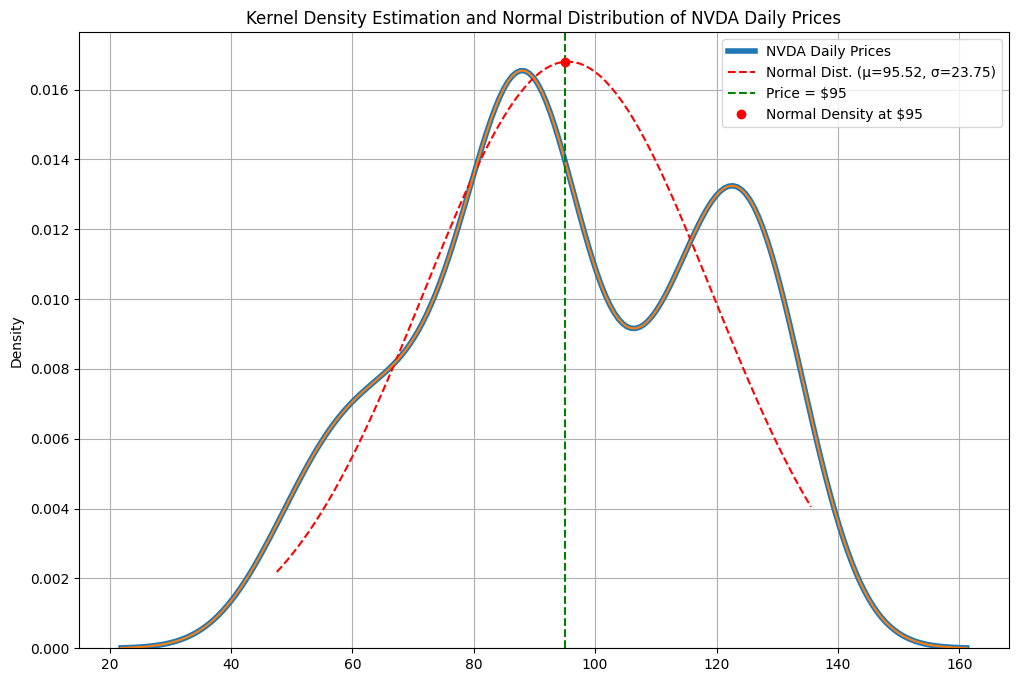

In [3]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm

start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 8, 31)
stock_symbol = 'NVDA'
stocks_by_day = yf.download(stock_symbol, start_date, end_date)
stocks_daily = stocks_by_day['Adj Close'].values

# Calculate mean (mu) and standard deviation (se) for the daily prices
mu = np.mean(stocks_daily)
se = np.std(stocks_daily)

# Set figure size larger (e.g., 12 inches wide and 8 inches tall)
plt.figure(1, figsize=(12, 8))
# Plot daily data KDE
plt.figure(1)
sns.kdeplot(data=stocks_daily, linewidth=4, label=f"{stock_symbol} Daily Prices")  # Add label for legend

# Generate x-values for normal distribution (range of stock prices)
x = np.linspace(min(stocks_daily), max(stocks_daily), 100)

# Plot normal distribution using mu and se
plt.plot(x, norm.pdf(x, mu, se), color='red', label=f'Normal Dist. (μ={mu:.2f}, σ={se:.2f})', linestyle='--')

# Highlight the difference at price = 220
price = 95
kde_density_at_price = sns.kdeplot(stocks_daily).get_lines()[0].get_data()
normal_density_at_price = norm.pdf(price, mu, se)

# plt.figure(figsize=(10,6))
# Add vertical lines to highlight densities at $220
plt.axvline(price, color='green', linestyle='--', label=f'Price = ${price}')
plt.plot(price, normal_density_at_price, 'ro', label=f'Normal Density at ${price}')
plt.title(f"Kernel Density Estimation and Normal Distribution of {stock_symbol} Daily Prices")
plt.legend()
plt.grid(True)

# Show the figure
plt.show()